<a href="https://colab.research.google.com/github/ManasAyyalaraju/Demo-repo/blob/main/notebooks/01_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Setup and Data Loading

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/Personal_Finance_ML_Project')

In [3]:
!pwd

/content/drive/MyDrive/Personal_Finance_ML_Project


In [4]:
!pip install imbalanced-learn xgboost shap -q

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
print(f"✓ Working directory: {os.getcwd()}")

✓ Working directory: /content/drive/MyDrive/Personal_Finance_ML_Project


In [11]:
from google.colab import files
files.upload()  # Select kaggle.json

# Setup Kaggle API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/.kaggle.json

# Download German Credit Data
!kaggle datasets download -d uciml/german-credit -p data/raw/ --unzip

# Download Lending Club Data
!kaggle datasets download -d wordsforthewise/lending-club -p data/raw/ --unzip

# Download Credit Card Fraud Data, force redownload
!kaggle datasets download -d mlg-ulb/creditcardfraud -p data/raw/ --unzip --force

print("✓ All datasets downloaded!")

Saving kaggle.json to kaggle (3).json
chmod: cannot access '/root/.kaggle/.kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/uciml/german-credit
License(s): DbCL-1.0
  0% 0.00/10.9k [00:00<?, ?B/s]
100% 10.9k/10.9k [00:00<00:00, 931kB/s]
Dataset URL: https://www.kaggle.com/datasets/wordsforthewise/lending-club
License(s): CC0-1.0
... resuming from 1301282816 bytes (55225094 bytes left) ...
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1761, in dataset_download_cli
    self.dataset_download_files(
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1668, in dataset_download_files
    self.download

# Initial Data Exploration

German Credit Dataset Exploraton

In [7]:
german_credit = pd.read_csv('data/raw/german_credit_data.csv')

In [8]:
german_credit.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,7,35,male,3,rent,little,moderate,6948,36,car
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,9,28,male,3,own,little,moderate,5234,30,car


In [ ]:
german_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [ ]:
german_credit.shape

(1000, 10)

In [ ]:
german_credit.dtypes

,0
Unnamed: 0,int64
Age,int64
Sex,object
Job,int64
Housing,object
Saving accounts,object
Checking account,object
Credit amount,int64
Duration,int64
Purpose,object


In [ ]:
german_credit.isnull().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0


In [ ]:
german_credit.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


Lending Club Exploration

In [9]:
lending_club = pd.read_csv('data/raw/accepted/accepted_2007_to_2018Q4.csv',nrows=100000, low_memory=False)

In [ ]:
lending_club.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,68426831,NaN,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
6,68476668,NaN,20000.0,20000.0,20000.0,36 months,9.17,637.58,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
7,67275481,NaN,20000.0,20000.0,20000.0,36 months,8.49,631.26,B,B1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
8,68466926,NaN,10000.0,10000.0,10000.0,36 months,6.49,306.45,A,A2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
9,68616873,NaN,8000.0,8000.0,8000.0,36 months,11.48,263.74,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
lending_club.shape

(100000, 151)

In [ ]:
lending_club.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [ ]:
lending_club.isnull().sum()

,0
id,0
member_id,100000
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
...,...
settlement_status,97051
settlement_date,97051
settlement_amount,97051
settlement_percentage,97051


Fraud Credit Card Data Exploration

In [12]:
fraud_data = pd.read_csv('data/raw/creditcard.csv')

In [13]:
fraud_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
fraud_data.shape

(284807, 31)

In [15]:
fraud_data.dtypes

,0
Time,float64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


In [16]:
fraud_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [17]:
fraud_data['Class'].value_counts()

,count
Class,
0,284315
1,492


In [18]:
fraud_pct = fraud_data['Class'].mean() * 100
print(f"\n🚨 Fraud percentage: {fraud_pct:.3f}% (Highly imbalanced!)")


🚨 Fraud percentage: 0.173% (Highly imbalanced!)


# Basic Data Visulization

German Credit Data Visualizations

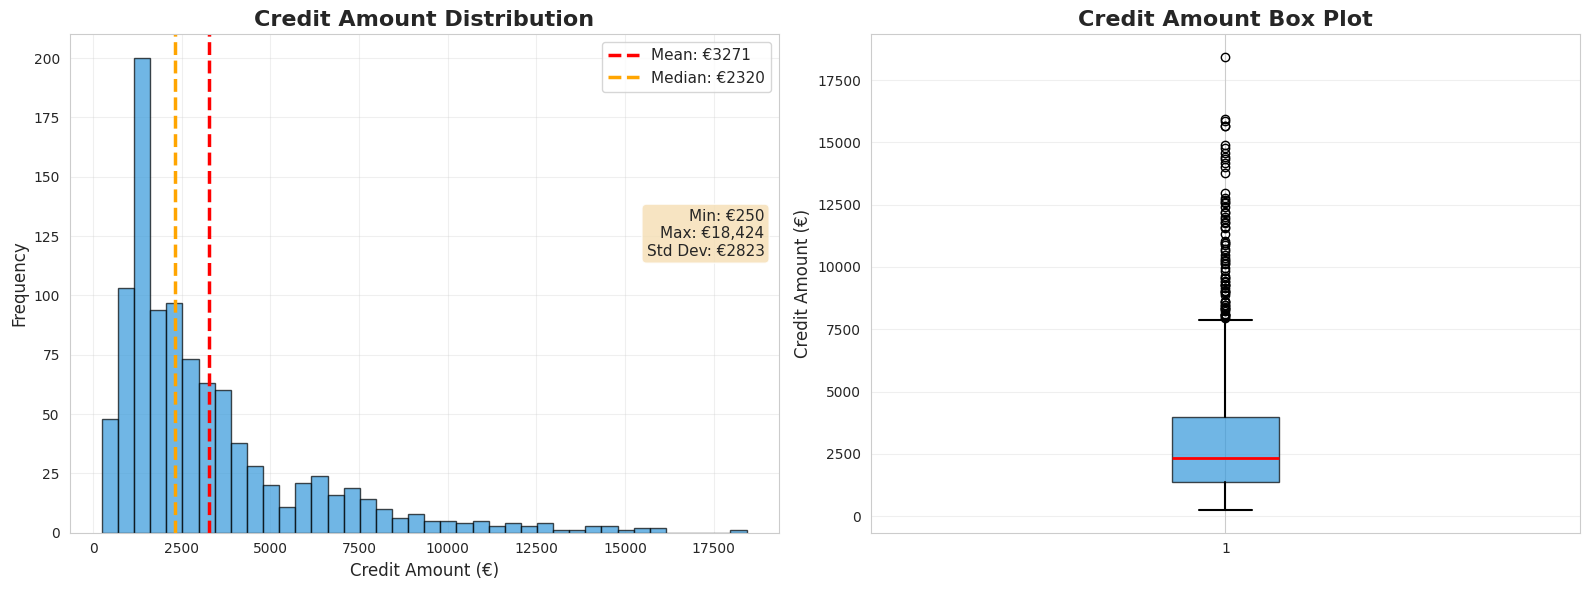

✓ Visualization 1 complete: Credit Amount Analysis


In [23]:
# Create figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left: Histogram with statistics
axes[0].hist(german_credit['Credit amount'], bins=40, color='#3498db',
             edgecolor='black', alpha=0.7)
axes[0].axvline(german_credit['Credit amount'].mean(), color='red',
                linestyle='--', linewidth=2.5, label=f'Mean: €{german_credit["Credit amount"].mean():.0f}')
axes[0].axvline(german_credit['Credit amount'].median(), color='orange',
                linestyle='--', linewidth=2.5, label=f'Median: €{german_credit["Credit amount"].median():.0f}')
axes[0].set_title('Credit Amount Distribution', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Credit Amount (€)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend(fontsize=11, loc='upper right')
axes[0].grid(alpha=0.3)

# Add statistics box
stats_text = f'Min: €{german_credit["Credit amount"].min():,.0f}\nMax: €{german_credit["Credit amount"].max():,.0f}\nStd Dev: €{german_credit["Credit amount"].std():.0f}'
axes[0].text(0.98, 0.65, stats_text, transform=axes[0].transAxes,
             fontsize=11, verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Right: Box plot
axes[1].boxplot(german_credit['Credit amount'], vert=True,
                patch_artist=True,
                boxprops=dict(facecolor='#3498db', alpha=0.7),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(linewidth=1.5),
                capprops=dict(linewidth=1.5))
axes[1].set_title('Credit Amount Box Plot', fontsize=16, fontweight='bold')
axes[1].set_ylabel('Credit Amount (€)', fontsize=12)
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("✓ Visualization 1 complete: Credit Amount Analysis")

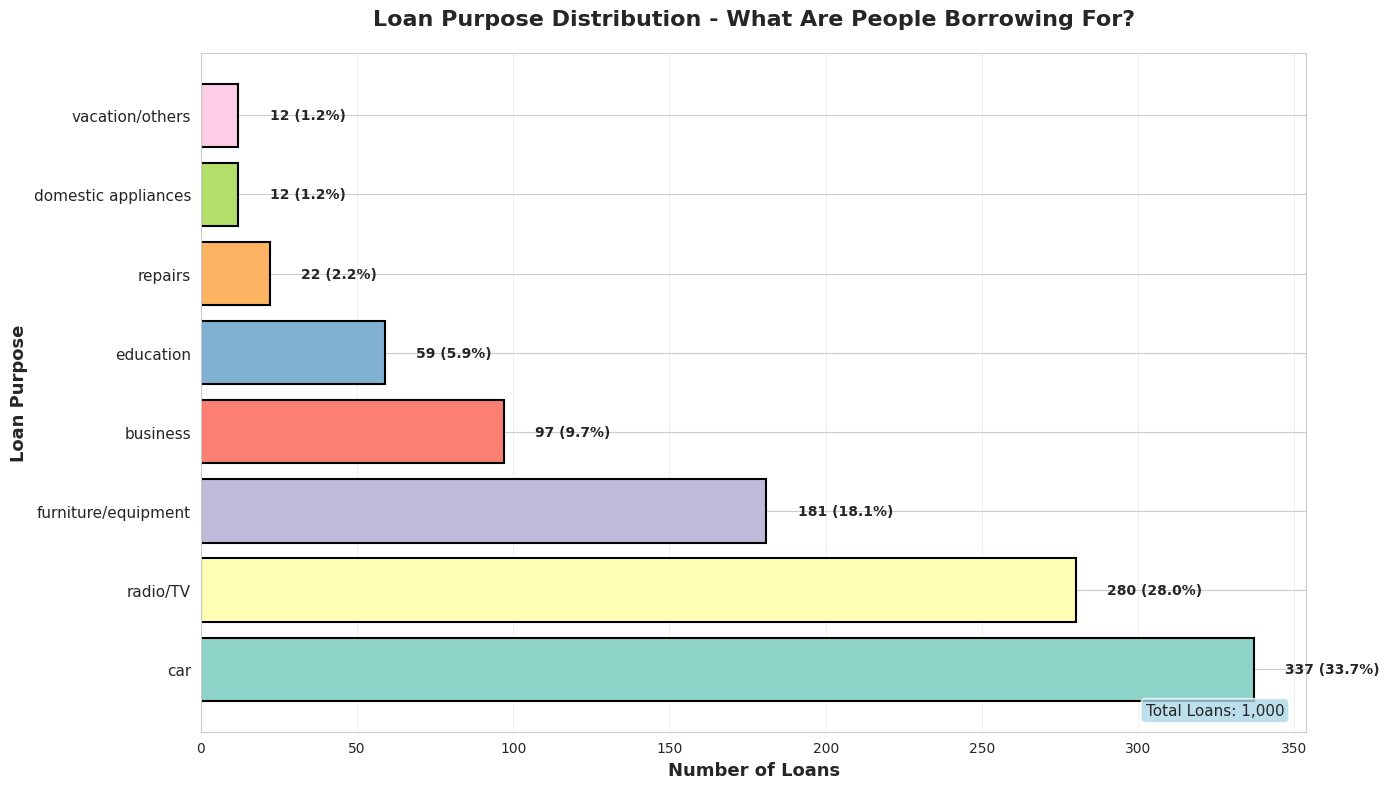

✓ Visualization 2 complete: Loan Purpose Distribution


In [24]:
plt.figure(figsize=(14, 8))

# Get purpose counts and percentages
purpose_counts = german_credit['Purpose'].value_counts()
total = len(german_credit)

# Create horizontal bar chart
colors = plt.cm.Set3(range(len(purpose_counts)))
bars = plt.barh(range(len(purpose_counts)), purpose_counts.values,
                color=colors, edgecolor='black', linewidth=1.5)

# Customize
plt.yticks(range(len(purpose_counts)), purpose_counts.index, fontsize=11)
plt.xlabel('Number of Loans', fontsize=13, fontweight='bold')
plt.ylabel('Loan Purpose', fontsize=13, fontweight='bold')
plt.title('Loan Purpose Distribution - What Are People Borrowing For?',
          fontsize=16, fontweight='bold', pad=20)
plt.grid(alpha=0.3, axis='x')

# Add value labels with percentages
for i, (count, bar) in enumerate(zip(purpose_counts.values, bars)):
    percentage = (count / total) * 100
    plt.text(count + 10, i, f'{count} ({percentage:.1f}%)',
             va='center', fontweight='bold', fontsize=10)

# Add total at bottom
plt.text(0.98, 0.02, f'Total Loans: {total:,}',
         transform=plt.gca().transAxes, fontsize=11,
         verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.show()

print("✓ Visualization 2 complete: Loan Purpose Distribution")

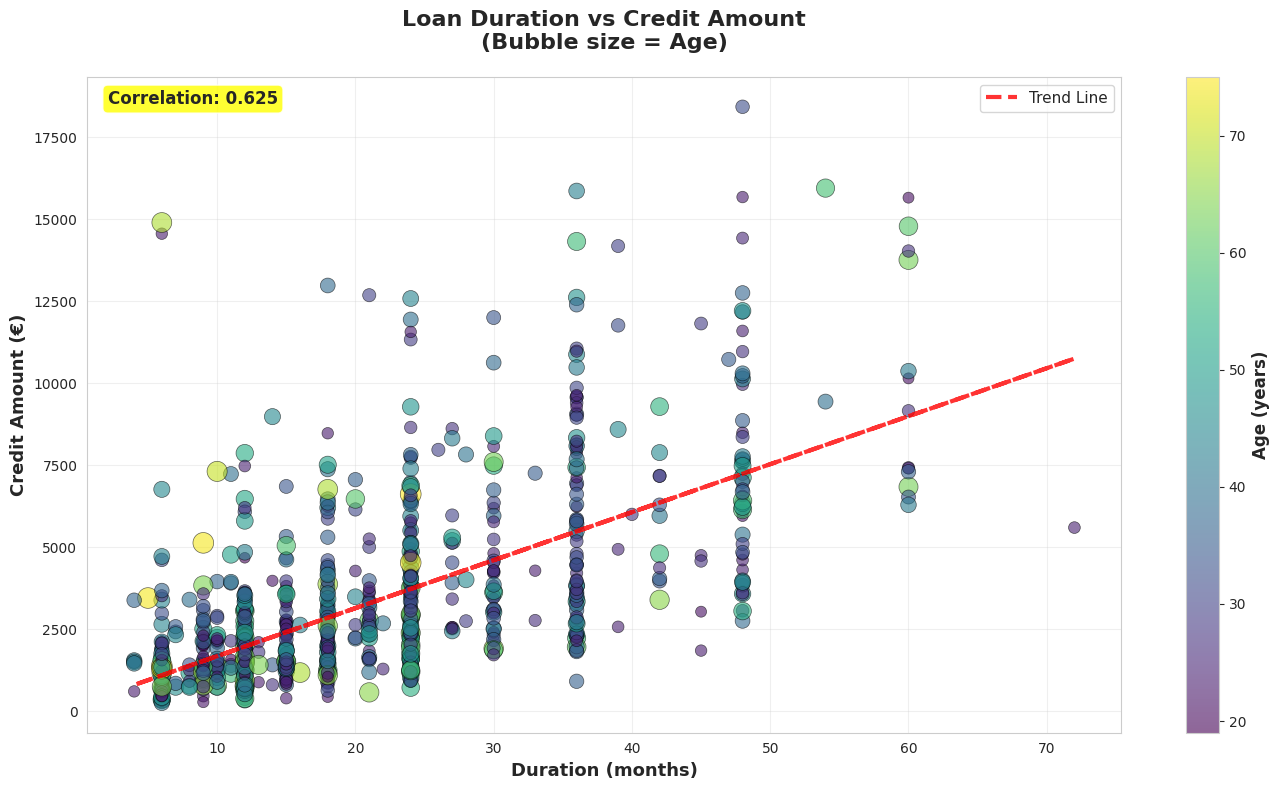

✓ Visualization 3 complete: Duration vs Amount Relationship
  Correlation coefficient: 0.625


In [25]:
fig, ax = plt.subplots(figsize=(14, 8))

# Create scatter plot with size based on age
scatter = ax.scatter(german_credit['Duration'],
                     german_credit['Credit amount'],
                     s=german_credit['Age']*3,  # Size based on age
                     alpha=0.6,
                     c=german_credit['Age'],  # Color based on age
                     cmap='viridis',
                     edgecolors='black',
                     linewidth=0.5)

# Add colorbar for age
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Age (years)', fontsize=12, fontweight='bold')

# Add trend line
z = np.polyfit(german_credit['Duration'], german_credit['Credit amount'], 1)
p = np.poly1d(z)
plt.plot(german_credit['Duration'], p(german_credit['Duration']),
         "r--", linewidth=3, alpha=0.8, label='Trend Line')

# Titles and labels
ax.set_title('Loan Duration vs Credit Amount\n(Bubble size = Age)',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Duration (months)', fontsize=13, fontweight='bold')
ax.set_ylabel('Credit Amount (€)', fontsize=13, fontweight='bold')
ax.grid(alpha=0.3)
ax.legend(fontsize=11)

# Calculate and display correlation
correlation = german_credit['Duration'].corr(german_credit['Credit amount'])
ax.text(0.02, 0.98, f'Correlation: {correlation:.3f}',
        transform=ax.transAxes, fontsize=12, fontweight='bold',
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

plt.tight_layout()
plt.show()

print("✓ Visualization 3 complete: Duration vs Amount Relationship")
print(f"  Correlation coefficient: {correlation:.3f}")

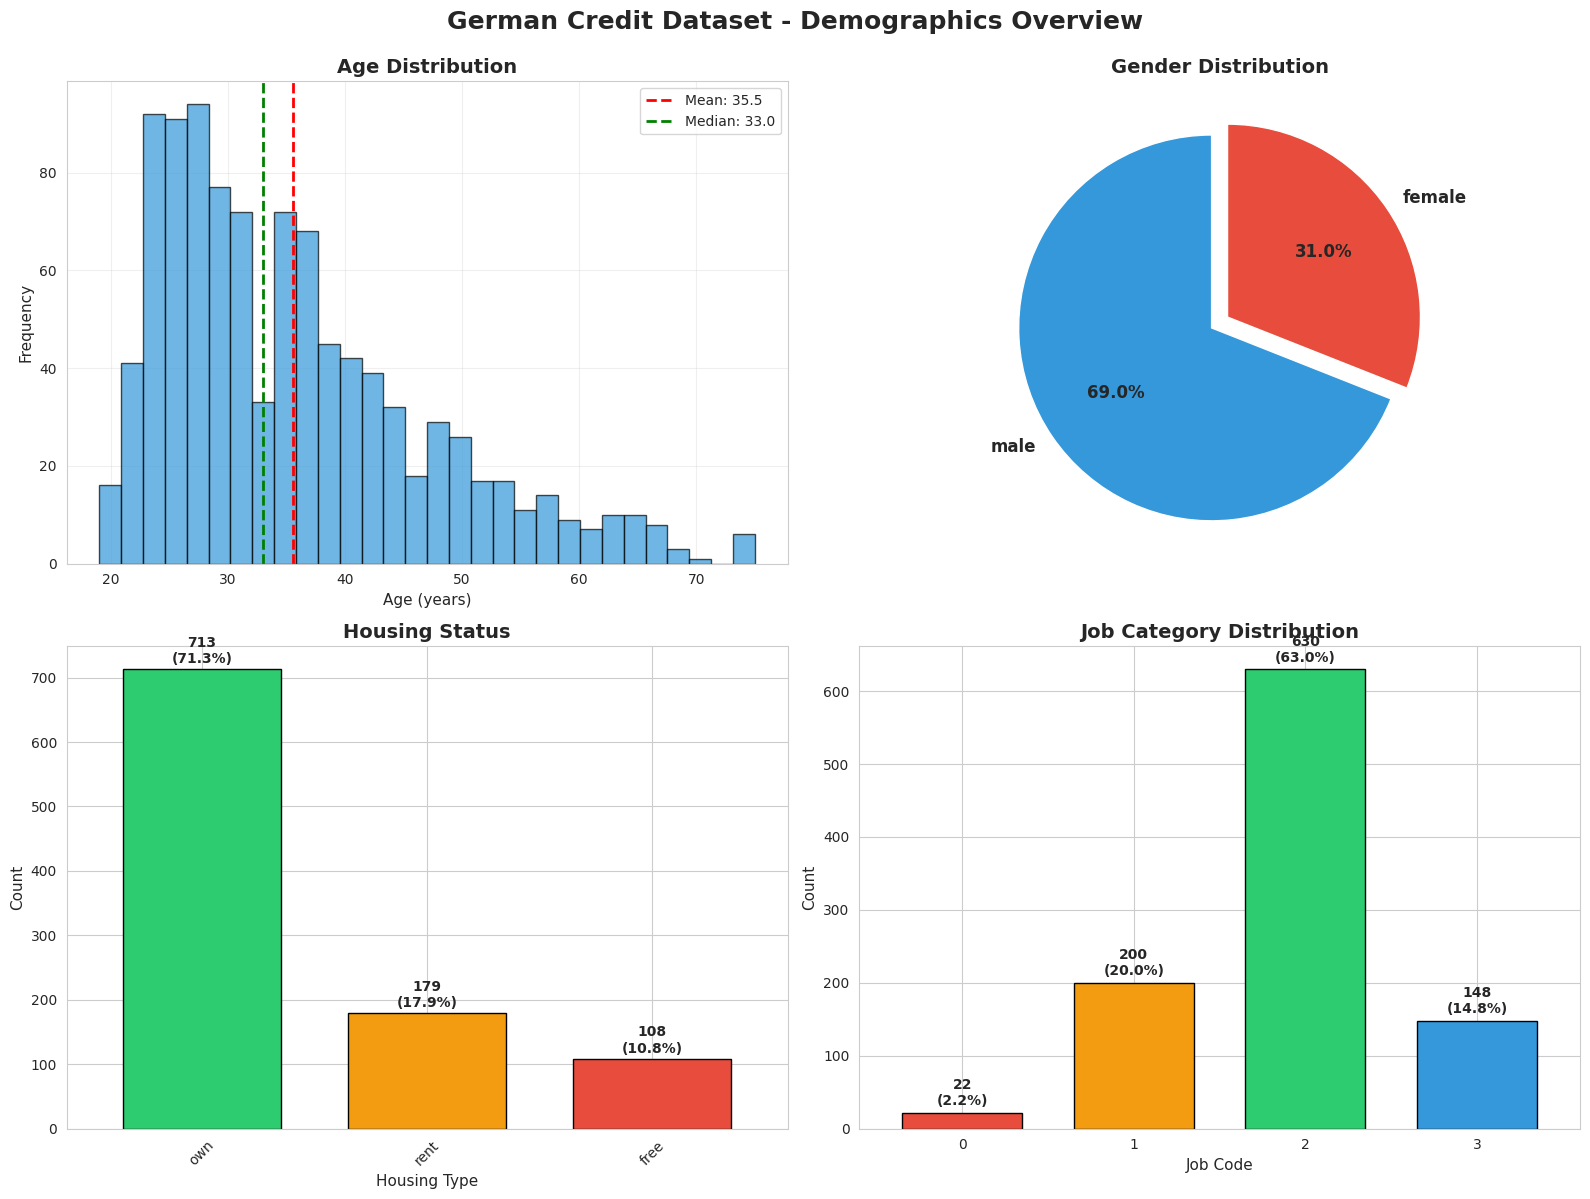

✓ Visualization 4 complete: Demographics Overview (4-panel)


In [26]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('German Credit Dataset - Demographics Overview',
             fontsize=18, fontweight='bold', y=0.995)

# Panel 1: Age Distribution
axes[0, 0].hist(german_credit['Age'], bins=30, color='#3498db',
                edgecolor='black', alpha=0.7)
axes[0, 0].axvline(german_credit['Age'].mean(), color='red',
                   linestyle='--', linewidth=2,
                   label=f'Mean: {german_credit["Age"].mean():.1f}')
axes[0, 0].axvline(german_credit['Age'].median(), color='green',
                   linestyle='--', linewidth=2,
                   label=f'Median: {german_credit["Age"].median():.1f}')
axes[0, 0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Age (years)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Panel 2: Gender Distribution
sex_counts = german_credit['Sex'].value_counts()
colors_sex = ['#3498db', '#e74c3c']
wedges, texts, autotexts = axes[0, 1].pie(sex_counts.values,
                                           labels=sex_counts.index,
                                           autopct='%1.1f%%',
                                           colors=colors_sex,
                                           startangle=90,
                                           explode=(0.05, 0.05),
                                           textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[0, 1].set_title('Gender Distribution', fontsize=14, fontweight='bold')

# Panel 3: Housing Status
housing_counts = german_credit['Housing'].value_counts()
colors_housing = ['#2ecc71', '#f39c12', '#e74c3c']
housing_counts.plot(kind='bar', ax=axes[1, 0],
                    color=colors_housing[:len(housing_counts)],
                    edgecolor='black', width=0.7)
axes[1, 0].set_title('Housing Status', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Housing Type', fontsize=11)
axes[1, 0].set_ylabel('Count', fontsize=11)
axes[1, 0].tick_params(axis='x', rotation=45)

# Add value labels
for i, v in enumerate(housing_counts.values):
    axes[1, 0].text(i, v + 10, f'{v}\n({v/len(german_credit)*100:.1f}%)',
                    ha='center', fontweight='bold', fontsize=10)

# Panel 4: Job Distribution
job_counts = german_credit['Job'].value_counts().sort_index()
colors_job = ['#e74c3c', '#f39c12', '#2ecc71', '#3498db']
job_counts.plot(kind='bar', ax=axes[1, 1],
                color=colors_job, edgecolor='black', width=0.7)
axes[1, 1].set_title('Job Category Distribution', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Job Code', fontsize=11)
axes[1, 1].set_ylabel('Count', fontsize=11)
axes[1, 1].tick_params(axis='x', rotation=0)

# Add value labels
for i, v in enumerate(job_counts.values):
    axes[1, 1].text(i, v + 10, f'{v}\n({v/len(german_credit)*100:.1f}%)',
                    ha='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

print("✓ Visualization 4 complete: Demographics Overview (4-panel)")

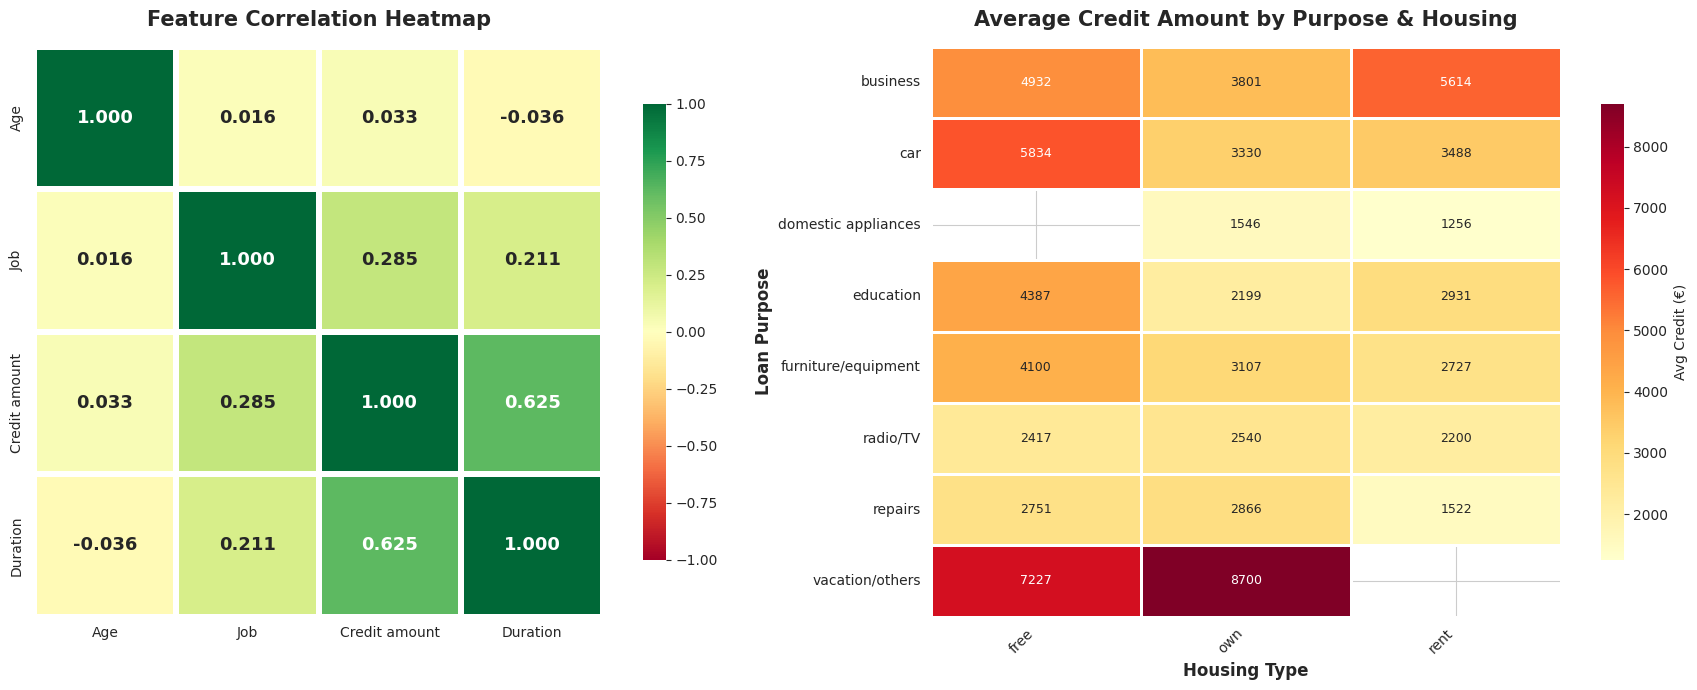

✓ Visualization 5 complete: Financial Profile Heatmaps

📊 Key Insights:
  • Strongest correlation: Duration & Credit Amount (0.625)
  • Age range: 19 - 75 years
  • Most common purpose: car
  • Average loan: €3271.26


In [27]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Left: Correlation Heatmap
numerical_cols = ['Age', 'Job', 'Credit amount', 'Duration']
corr_matrix = german_credit[numerical_cols].corr()

sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='RdYlGn',
            center=0, square=True, linewidths=3, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, annot_kws={'fontsize': 13, 'fontweight': 'bold'},
            ax=axes[0])
axes[0].set_title('Feature Correlation Heatmap', fontsize=15, fontweight='bold', pad=15)

# Right: Average Credit Amount by Purpose and Housing
pivot_data = german_credit.groupby(['Purpose', 'Housing'])['Credit amount'].mean().unstack()

sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='YlOrRd',
            linewidths=2, cbar_kws={"shrink": 0.8, "label": "Avg Credit (€)"},
            annot_kws={'fontsize': 9}, ax=axes[1])
axes[1].set_title('Average Credit Amount by Purpose & Housing',
                  fontsize=15, fontweight='bold', pad=15)
axes[1].set_xlabel('Housing Type', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Loan Purpose', fontsize=12, fontweight='bold')
plt.setp(axes[1].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[1].get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print("✓ Visualization 5 complete: Financial Profile Heatmaps")

# Print key insights
print("\n📊 Key Insights:")
print(f"  • Strongest correlation: Duration & Credit Amount ({corr_matrix.loc['Duration', 'Credit amount']:.3f})")
print(f"  • Age range: {german_credit['Age'].min()} - {german_credit['Age'].max()} years")
print(f"  • Most common purpose: {german_credit['Purpose'].mode()[0]}")
print(f"  • Average loan: €{german_credit['Credit amount'].mean():.2f}")